# Texas Death Row Data With Last Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

In [38]:
#the data set being analyzed 

death_row = pd.read_csv('Final-Statement-of-Death-Row.csv')
death_row

,Unnamed: 0,age,county,date,execution,gender,first_name,last_name,last_statement,last_statement_url,offender_information_url,race,tdcjnumber
0,0,61,Harris,1/30/2019,559,M,Robert,Jennings,To my friends and family it was a nice journey...,https://www.tdcj.texas.gov/death_row/dr_info/j...,https://www.tdcj.texas.gov/death_row/dr_info/j...,Black,956
1,1,43,Dallas,12/11/2018,558,M,Alvin,"Braziel, Jr.","Yes Sir, I would like to thank the Shape Commu...",https://www.tdcj.texas.gov/death_row/dr_info/b...,https://www.tdcj.texas.gov/death_row/dr_info/b...,Black,999393
2,2,47,Dallas,12/04/2018,557,M,Joseph,Garcia,Yes Sir. Dear Heavenly Father please forgive t...,https://www.tdcj.texas.gov/death_row/dr_info/g...,https://www.tdcj.texas.gov/death_row/dr_info/g...,Hispanic,999441
3,3,64,Hidalgo,11/14/2018,556,M,Robert,Ramos,I am very thankful for all the hard work the M...,https://www.tdcj.texas.gov/death_row/dr_info/r...,https://www.tdcj.texas.gov/death_row/dr_info/_...,Hispanic,999062
4,4,46,Hopkins,9/27/2018,555,M,Daniel,Acker,No statement given.,https://www.tdcj.texas.gov/death_row/dr_info/a...,https://www.tdcj.texas.gov/death_row/dr_info/a...,White,999381
5,5,51,Smith,9/26/2018,554,M,Troy,Clark,"Thank you I love you all. Sandra, nice meeting...",https://www.tdcj.texas.gov/death_row/dr_info/c...,https://www.tdcj.texas.gov/death_row/dr_info/c...,White,999351
6,6,34,Bexar,7/17/2018,553,M,Christopher,Young,l want to make sure the Patel family knows I l...,https://www.tdcj.texas.gov/death_row/dr_info/y...,https://www.tdcj.texas.gov/death_row/dr_info/y...,Black,999508
7,7,66,Harris,6/27/2018,552,M,Danny,Bible,No last statement,https://www.tdcj.texas.gov/death_row/dr_info/b...,https://www.tdcj.texas.gov/death_row/dr_info/b...,White,999455
8,8,37,Bexar,5/16/2018,551,M,Juan,Castillo,To everyone that has been there for me you kno...,https://www.tdcj.texas.gov/death_row/dr_info/c...,https://www.tdcj.texas.gov/death_row/dr_info/c...,Hispanic,999502
9,9,31,Tarrant,4/25/2018,550,M,Erick,Davila,"Yes, I would like to say nephew it burns huh. ...",https://www.tdcj.texas.gov/death_row/dr_info/d...,https://www.tdcj.texas.gov/death_row/dr_info/d...,Black,999545


In [39]:
#removal of columns not used

death_row.drop(columns = ["tdcjnumber", "Unnamed: 0", "last_statement_url", 
                          "offender_information_url", "date", "execution"])

,age,county,gender,first_name,last_name,last_statement,race
0,61,Harris,M,Robert,Jennings,To my friends and family it was a nice journey...,Black
1,43,Dallas,M,Alvin,"Braziel, Jr.","Yes Sir, I would like to thank the Shape Commu...",Black
2,47,Dallas,M,Joseph,Garcia,Yes Sir. Dear Heavenly Father please forgive t...,Hispanic
3,64,Hidalgo,M,Robert,Ramos,I am very thankful for all the hard work the M...,Hispanic
4,46,Hopkins,M,Daniel,Acker,No statement given.,White
5,51,Smith,M,Troy,Clark,"Thank you I love you all. Sandra, nice meeting...",White
6,34,Bexar,M,Christopher,Young,l want to make sure the Patel family knows I l...,Black
7,66,Harris,M,Danny,Bible,No last statement,White
8,37,Bexar,M,Juan,Castillo,To everyone that has been there for me you kno...,Hispanic
9,31,Tarrant,M,Erick,Davila,"Yes, I would like to say nephew it burns huh. ...",Black


# Graphs and Visualizations

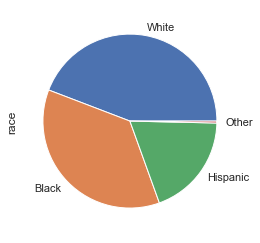

In [40]:
#pie chart that compares the race of the inmates

sns.set(style="darkgrid")
death_row['race'].value_counts().plot('pie')

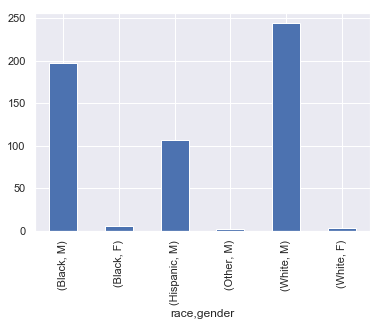

In [41]:
#graph showing the amount of inmates filtered by gender and race
#white males are the highest amount of those executed

death_row.groupby(by='race')['gender'].value_counts().plot('bar')

In [42]:
#Ages of inmates

print("Minimum Age is {}".format(death_row.age.min()))
print("Maximum Age is {}".format(death_row.age.max()))
print("Average Age is {}".format(death_row.age.mean()))

Minimum Age is 24
Maximum Age is 67
Average Age is 39.604651162790695


Text(0.5, 1.0, 'Death Row Inmates Ages: Gender comparison')

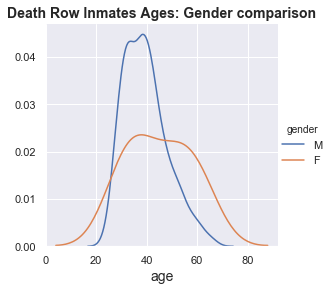

In [13]:
#Gender vs. Age

sns.FacetGrid(death_row, hue='gender', height=4).map(sns.kdeplot, 'age').add_legend()
plt.xlabel('age', fontsize=14)
plt.title('Death Row Inmates Ages: Gender comparison', fontsize=14, fontweight='bold')

Text(0.5, 0.98, 'Death Row ages: Race comparison')

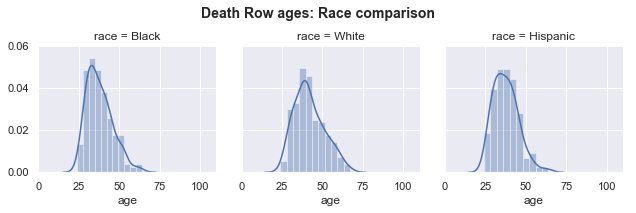

In [17]:
#Age vs Race

shown = ['Black', 'White', 'Hispanic']
death_row['race'] = death_row['race'].astype('category')
death_row.race.cat.set_categories(shown, inplace=True)
g = sns.FacetGrid(death_row, col='race')  
g.map(sns.distplot, 'age')
g.set(xlim=(0, None))
plt.subplots_adjust(top=0.8)
g.set(xlim=(0, 110), ylim=(0, 0.06), xlabel='age')
g.fig.suptitle('Death Row ages: Race comparison', fontsize=14, fontweight='bold')

Text(0.5, 1.0, 'Age distribution of Races')

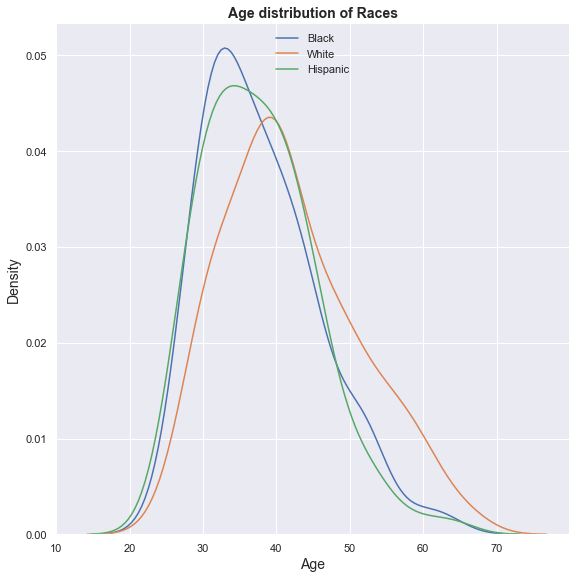

In [18]:
#previous three graphs shown on one graph
#white inmates appear to be executed at an older age compared to the others

sns.FacetGrid(death_row, hue='race', height=8).map(sns.kdeplot, 'age')
plt.legend(loc=9, frameon=False)
plt.xlim(left=10)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
sns.despine(left=True)
plt.title('Age distribution of Races', fontsize=14, fontweight='bold')

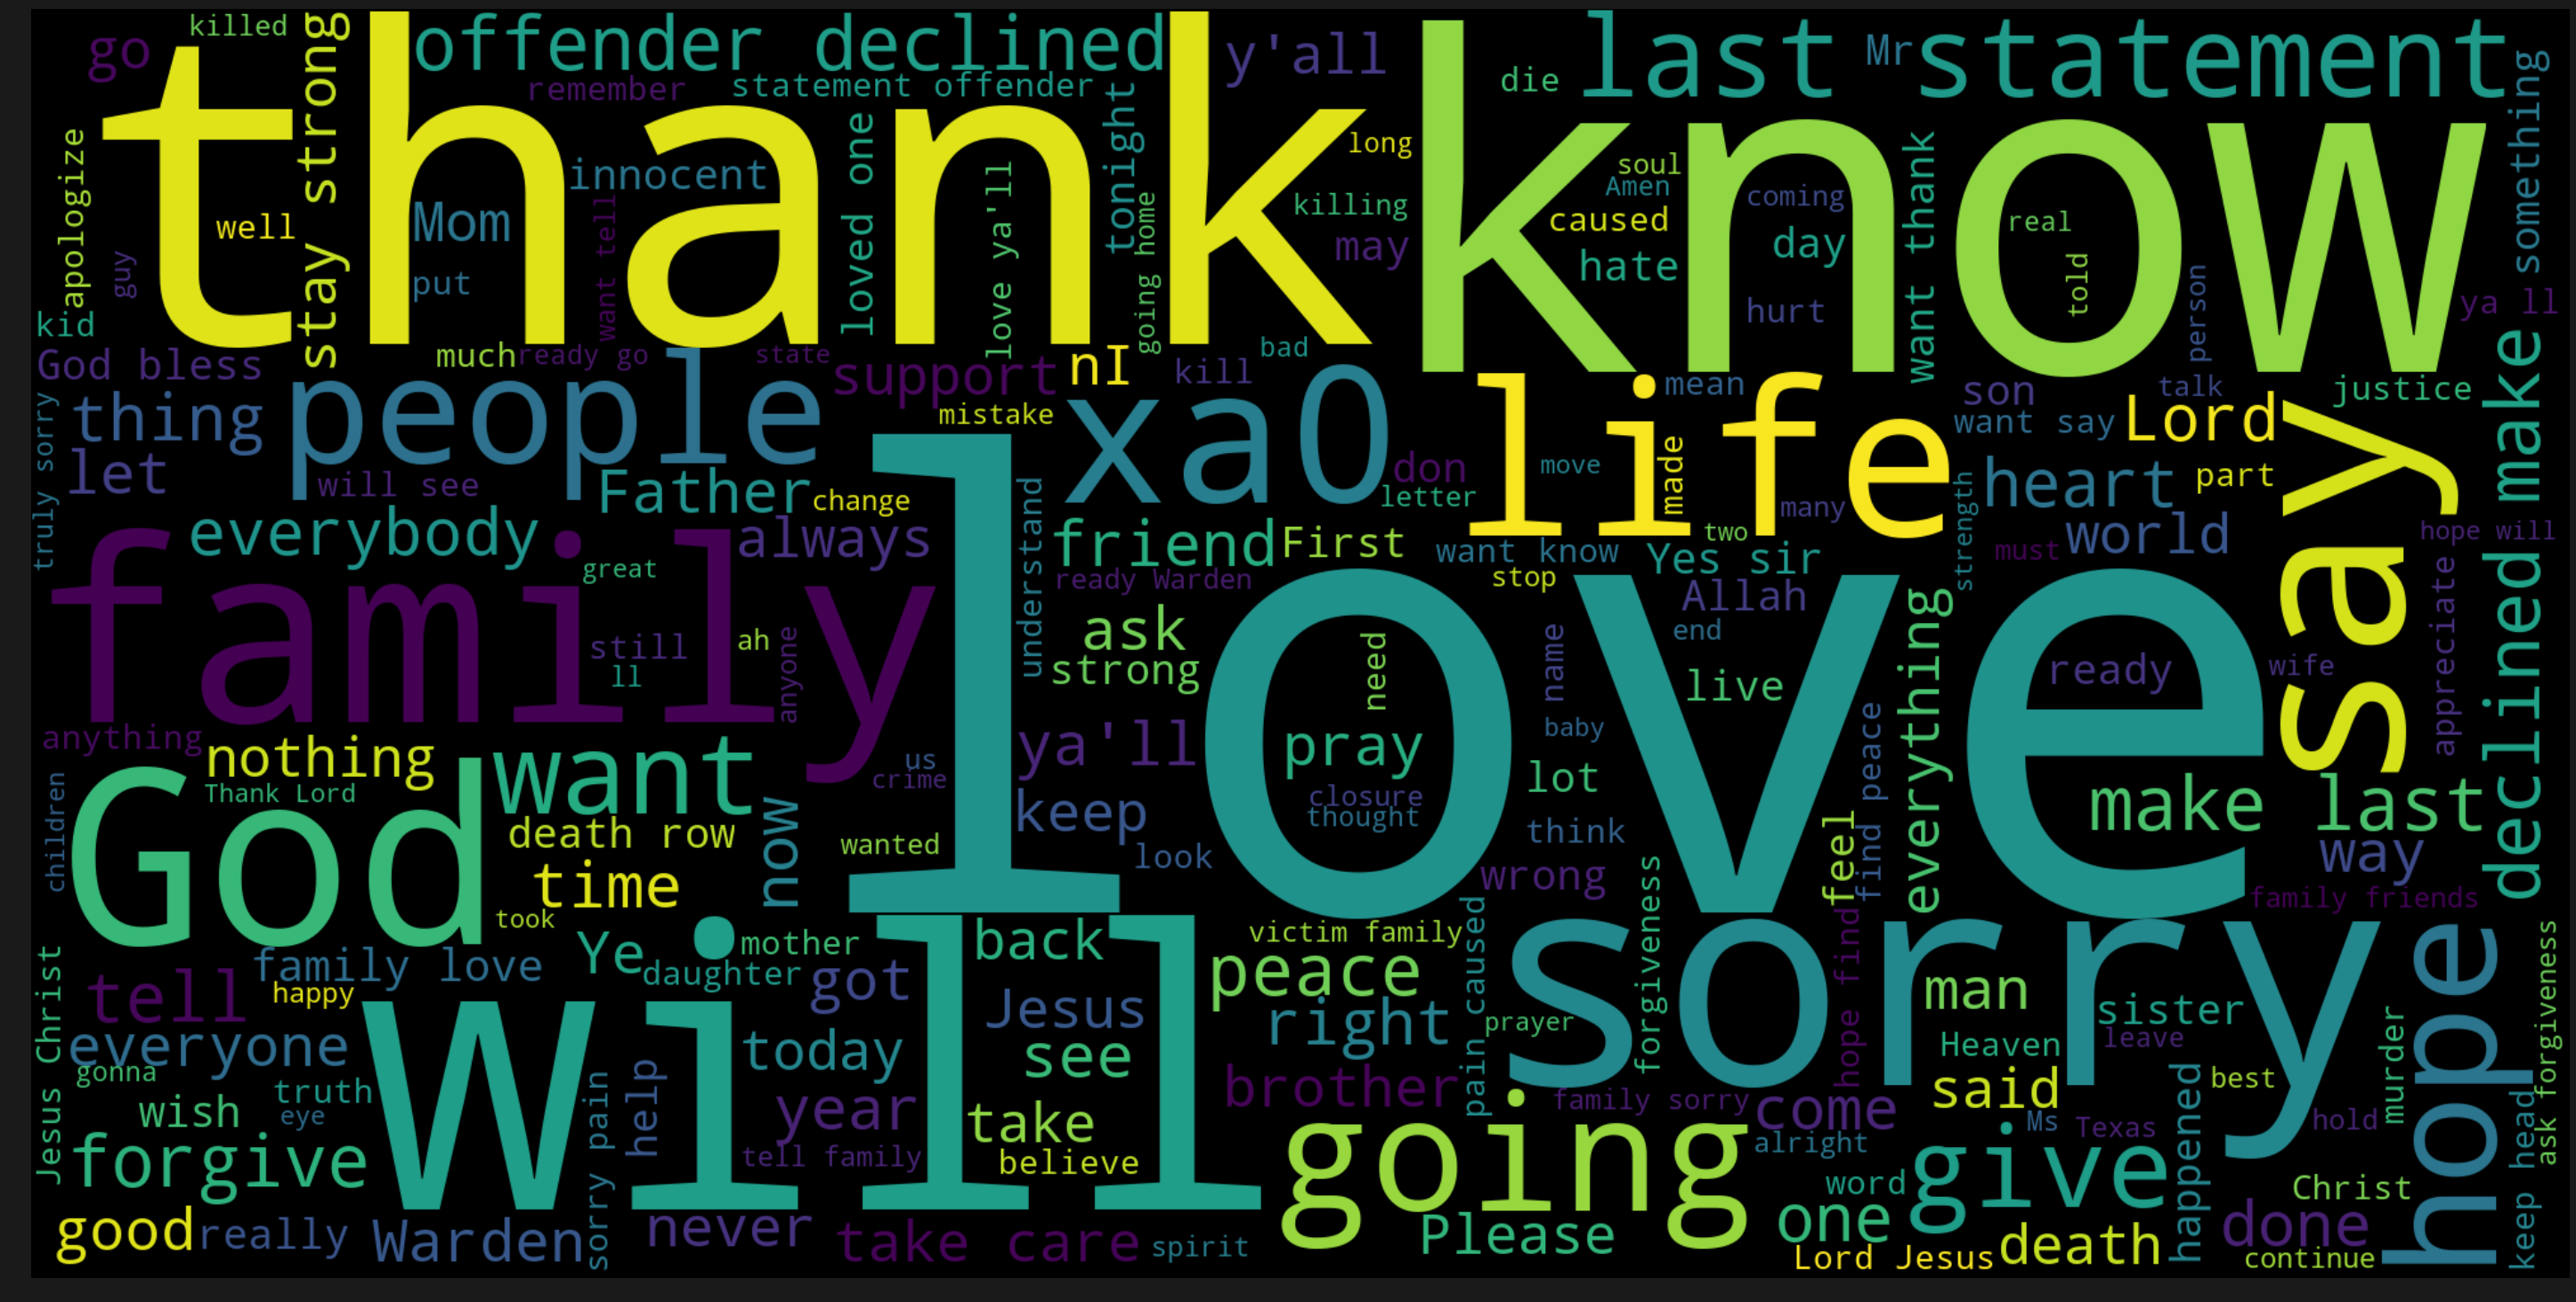

In [26]:
#the most common words being said in their last statements

text = death_row.last_statement.values
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

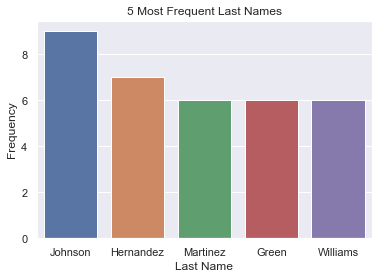

In [32]:
plt.xlabel("Last Name")
plt.ylabel("Frequency")
plt.title("5 Most Frequent Last Names")
sns.barplot(x=death_row.last_name.value_counts()[:5].index,y=death_row.last_name.value_counts()[:5].values)
plt.show()

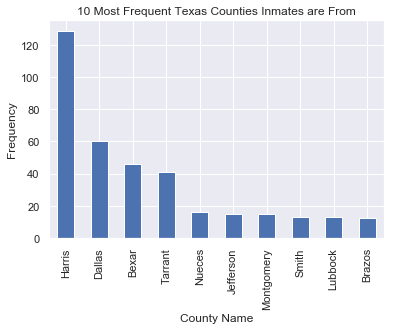

In [35]:
plt.xlabel("County Name")
plt.ylabel("Frequency")
plt.title("10 Most Frequent Texas Counties Inmates are From")
death_row['county'].value_counts().head(10).plot('bar')